In [14]:
import numpy as np
np.random.seed(42)
X = np.random.normal(0, 1, 100)
epsilon = np.random.normal(0, 1, 100)
X

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [15]:
# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)


In [16]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Prepare dataset with polynomial features
data = pd.DataFrame({'X': X})
for i in range(2, 11):
    data[f'X^{i}'] = X**i

# Add intercept
data = sm.add_constant(data)

# Forward stepwise selection
def forward_selection(data, response):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = []
    best_models = []

    while remaining_features:
        best_model = None
        best_cp = np.inf

        for feature in remaining_features:
            model = sm.OLS(response, data[selected_features + [feature] + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by forward selection
best_model_forward = forward_selection(data, Y)
print(best_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.35e-46
Time:                        00:58:25   Log-Likelihood:                -142.36
No. Observations:                 100   AIC:                             306.7
Df Residuals:                      89   BIC:                             335.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.1893      0.764      5.484      0.0

In [17]:
def backward_selection(data, response):
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = remaining_features[:]
    best_models = []

    while selected_features:
        best_model = None
        best_cp = np.inf

        for feature in selected_features:
            temp_features = selected_features[:]
            temp_features.remove(feature)
            model = sm.OLS(response, data[temp_features + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                removed_feature = feature

        if best_model is None:
            break

        selected_features.remove(removed_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by backward selection
best_model_backward = backward_selection(data, Y)
print(best_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 18 Nov 2024   Prob (F-statistic):                nan
Time:                        00:58:47   Log-Likelihood:                -274.44
No. Observations:                 100   AIC:                             550.9
Df Residuals:                      99   BIC:                             553.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2627      0.378      3.338      0.0

C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5707570272126077, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.269147055378653, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1421900562125984, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_d

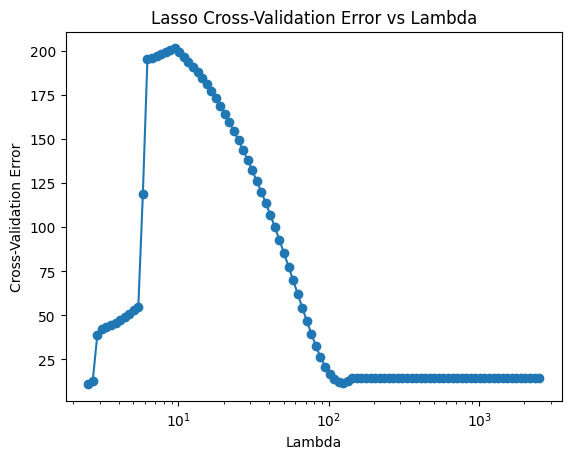

In [19]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso = LassoCV(cv=10).fit(X_poly, Y)

plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1), marker='o')
plt.xlabel('Lambda')
plt.ylabel('Cross-Validation Error')
plt.title('Lasso Cross-Validation Error vs Lambda')
plt.xscale('log')
plt.show()

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoCV
import statsmodels.api as sm
import numpy as np

# Assuming X_poly is defined and epsilon is created
# Example of how X_poly might look like (X raised to polynomial degrees):
X_poly = np.random.randn(100, 10)  # Example feature set
beta_0 = 0  # Example intercept
beta_7 = 7
epsilon = np.random.randn(100)  # Noise term
Y_new = beta_0 + beta_7 * X_poly[:, 7]**7 + epsilon  # Adjusted model

# Forward stepwise selection for the new model
linear_model = LinearRegression()  # Use LinearRegression as the base model for feature selection
forward_sfs_new = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='forward')
forward_sfs_new.fit(X_poly, Y_new)
selected_features_forward_new = forward_sfs_new.get_support(indices=True)

# Fit the model with selected features
X_forward_selected_new = X_poly[:, selected_features_forward_new]
model_forward_new = sm.OLS(Y_new, sm.add_constant(X_forward_selected_new)).fit()

print("Forward Stepwise Selection Coefficients for New Model:")
print(model_forward_new.params)

# Lasso for the new model
lasso_new = LassoCV(cv=10).fit(X_poly, Y_new)
print("Lasso Coefficients for New Model:")
print(lasso_new.coef_)


Forward Stepwise Selection Coefficients for New Model:
[-266.40965923   -3.55208569  -80.63428406   17.4039447   109.94526299
   -5.33417907]
Lasso Coefficients for New Model:
[  0.         104.58588979  -0.          -0.           0.
 -42.80020607   0.         605.88148804  -0.         131.70834981]
